In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/uit-x-thpt-stress-dataset/feature_set.npy
/kaggle/input/uit-x-thpt-stress-dataset/train.csv
/kaggle/input/uit-x-thpt-stress-dataset/test.csv


In [2]:
train_df = pd.read_csv('/kaggle/input/uit-x-thpt-stress-dataset/train.csv')

print(train_df)
print(train_df.columns)

     anxiety_level  self_esteem  mental_health_history  depression  headache  \
0               13           25                      1          10         2   
1               19           11                      1          25         4   
2                1           25                      0           3         1   
3               15           10                      1          17         4   
4                7           27                      0           0         1   
..             ...          ...                    ...         ...       ...   
875              9           23                      1          24         4   
876             17           12                      1          22         4   
877             16           12                      1          15         4   
878              8           30                      0           4         1   
879             14           12                      0          24         0   

     blood_pressure  sleep_quality  bre

<h1> EDA </h1>

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

     anxiety_level  self_esteem  mental_health_history  depression  headache  \
0               13           25                      1          10         2   
1               19           11                      1          25         4   
2                1           25                      0           3         1   
3               15           10                      1          17         4   
4                7           27                      0           0         1   
..             ...          ...                    ...         ...       ...   
875              9           23                      1          24         4   
876             17           12                      1          22         4   
877             16           12                      1          15         4   
878              8           30                      0           4         1   
879             14           12                      0          24         0   

     blood_pressure  sleep_quality  bre

<Axes: xlabel='stress_level', ylabel='count'>

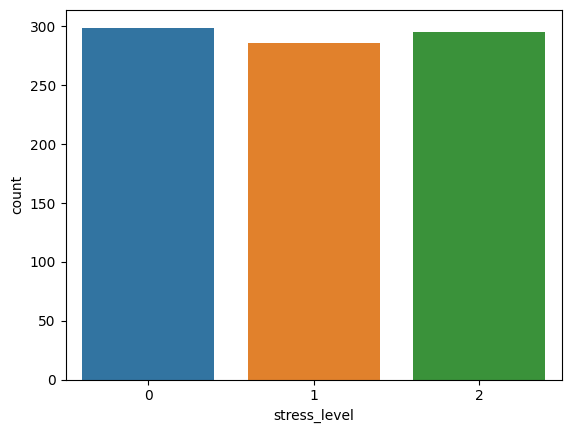

In [4]:
print(train_df)
sns.countplot(train_df, x = train_df['stress_level'])

#Đánh giá đầu tiên là: các class khá cân bằng

<h2 style = 'font-size: 25px'> Psychological Factor </h2>


Index(['anxiety_level', 'self_esteem', 'mental_health_history', 'depression'], dtype='object')
the field anxiety_level lacks 0
the field self_esteem lacks 0
the field mental_health_history lacks 0
the field depression lacks 0


'\nTừ việc phân tích đơn biến, ta có thể thấy rằng:\nanxiety_level: \n- anxiety_level: thấp thì sẽ không có stress\n- anxiety vừa: thì đa số sẽ tạo ra eugenic stress\n- anxiety cao: đa số dẫn đến distress\n\nself_esteem (mức đánh giá bản thân): \n- cao (từ ): không stress\n- vừa: eugenic stress (kiểu ngang)\n- thấp: distress\n\nmental_health_factor(có tiền sử tâm lý):\n0: hầu như là ko stress/eugstress\n1: hầu như là distress/eutress\n\ndepression: giống như anxiety_level\n'

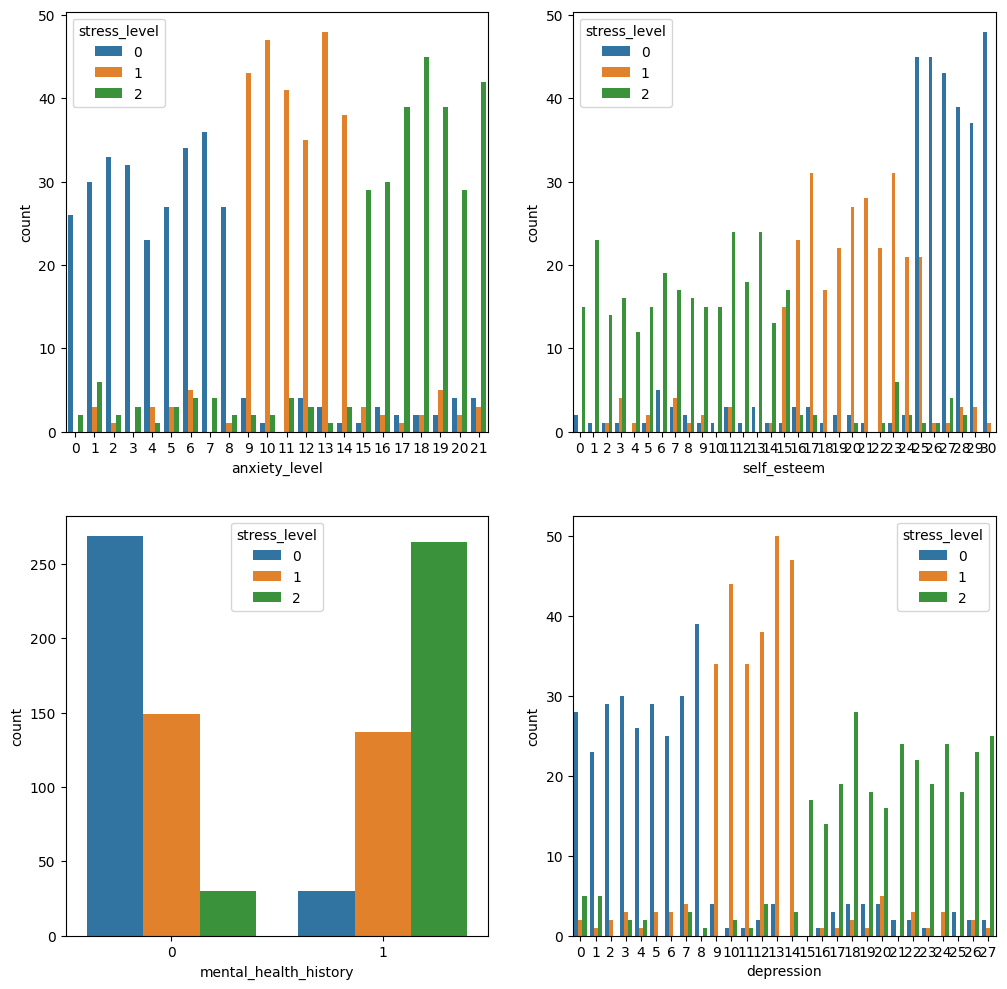

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
columns = train_df.columns[0:4]
print(columns)

# sns.countplot(x = train_df['anxiety_level'], hue = train_df['stress_level'])
fig, axs = plt.subplots(2, 2, figsize = (12, 12))
for i in range(2):
    for j in range(2):
        sns.countplot(x = train_df[columns[i * 2 + j]], hue = train_df['stress_level'], ax = axs[i, j])

for i in range(2):
    for j in range(2):
        print(f'the field {columns[i * 2 + j]} lacks {sum(train_df[columns[i * 2 + j]].isna())}')

'''
Từ việc phân tích đơn biến, ta có thể thấy rằng:
anxiety_level: 
- anxiety_level: thấp thì sẽ không có stress
- anxiety vừa: thì đa số sẽ tạo ra eugenic stress
- anxiety cao: đa số dẫn đến distress

self_esteem (mức đánh giá bản thân): 
- cao (từ ): không stress
- vừa: eugenic stress (kiểu ngang)
- thấp: distress

mental_health_factor(có tiền sử tâm lý):
0: hầu như là ko stress/eugstress
1: hầu như là distress/eutress

depression: giống như anxiety_level
'''

<h2> Physiological factors</h2>

Index(['headache', 'blood_pressure', 'sleep_quality', 'breathing_problem'], dtype='object')
the field headache lacks 0
the field blood_pressure lacks 0
the field sleep_quality lacks 0
the field breathing_problem lacks 0


'\nheadache: \n0: cân bằng\ntừ 1-5: chuyển dịch dần từ 0-->2\n- Nhóm 3: đặc biệt khi nó là điểm giao thoa giữa hai nhóm eustress và distress.\n\nblood_pressure: \n1: eustress\n2: ko stress\n3: chủ yếu là distress\n\nsleep_quality:\n0: như nhau - indecisive\n1-5: distress --> eugenic --> ko stress\n\nbreathing problem:\n0: như nhau.\n1: no stress\n2: eugenic stress + no_stress\n3, 4, 5: distress chiếm một lượng rất lớn.\nđặc biệt có 4: lại tạo ra eugenic stress\n'

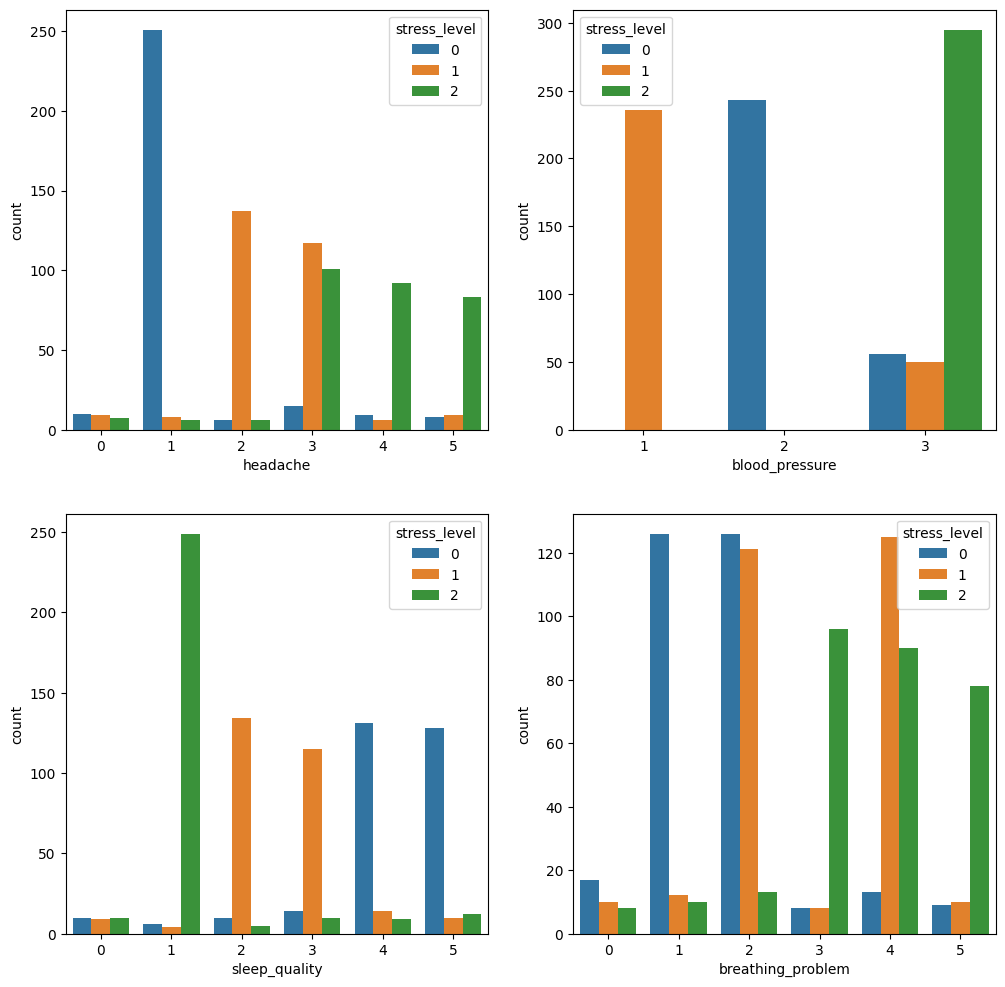

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
columns = train_df.columns[4:8]
print(columns)

# sns.countplot(x = train_df['anxiety_level'], hue = train_df['stress_level'])
fig, axs = plt.subplots(2, 2, figsize = (12, 12))
for i in range(2):
    for j in range(2):
        sns.countplot(x = train_df[columns[i * 2 + j]], hue = train_df['stress_level'], ax = axs[i, j])

for i in range(2):
    for j in range(2):
        print(f'the field {columns[i * 2 + j]} lacks {sum(train_df[columns[i * 2 + j]].isna())}')


'''
headache: 
0: cân bằng
từ 1-5: chuyển dịch dần từ 0-->2
- Nhóm 3: đặc biệt khi nó là điểm giao thoa giữa hai nhóm eustress và distress.

blood_pressure: 
1: eustress
2: ko stress
3: chủ yếu là distress

sleep_quality:
0: như nhau - indecisive
1-5: distress --> eugenic --> ko stress

breathing problem:
0: như nhau.
1: no stress
2: eugenic stress + no_stress
3, 4, 5: distress chiếm một lượng rất lớn.
đặc biệt có 4: lại tạo ra eugenic stress
'''


<h2>Environmental Factors</h2>

Index(['noise_level', 'living_conditions', 'safety', 'basic_needs'], dtype='object')
the field noise_level lacks 0
the field living_conditions lacks 0
the field safety lacks 0
the field basic_needs lacks 0


'\nnoise level: \n0: cân bằng\ntừ 1-5: chuyển dịch dần từ 0-->2\n\nliving conditions: \ndistress --> eustress --> stress\nđặc biệt: 5 là như nhau --> bởi vì nó sẽ ko còn trọng số, đó nó sẽ không còn phụ thuộc vào living conditions nữa.\n\nsafety:\n0: như nhau - indecisive\n1-5: distress --> eugenic --> ko stress\n\nbasic needs:\n0: như nhau.\ndistress --> eugenic --> no stress\n'

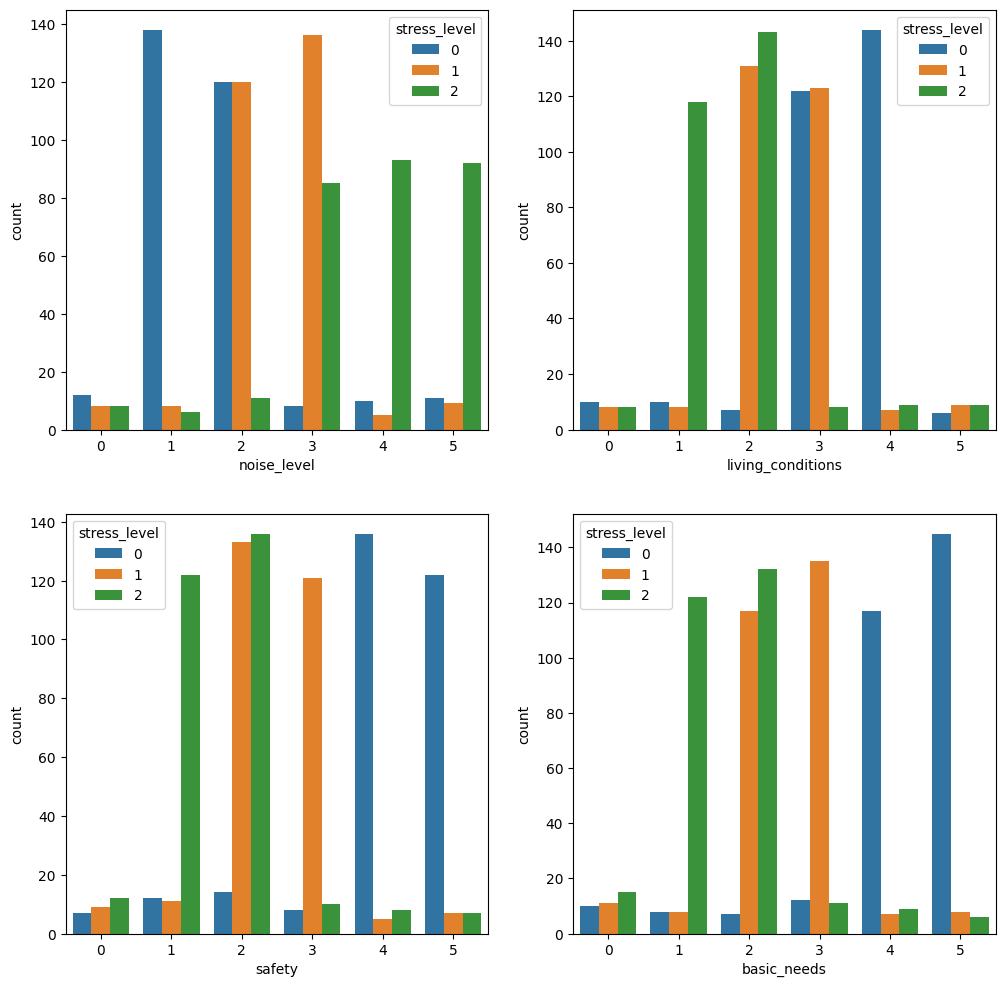

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
columns = train_df.columns[8:12]
print(columns)

# sns.countplot(x = train_df['anxiety_level'], hue = train_df['stress_level'])
fig, axs = plt.subplots(2, 2, figsize = (12, 12))
for i in range(2):
    for j in range(2):
        sns.countplot(x = train_df[columns[i * 2 + j]], hue = train_df['stress_level'], ax = axs[i, j])

for i in range(2):
    for j in range(2):
        print(f'the field {columns[i * 2 + j]} lacks {sum(train_df[columns[i * 2 + j]].isna())}')

'''
noise level: 
0: cân bằng
từ 1-5: chuyển dịch dần từ 0-->2

living conditions: 
distress --> eustress --> stress
đặc biệt: 5 là như nhau --> bởi vì nó sẽ ko còn trọng số, đó nó sẽ không còn phụ thuộc vào living conditions nữa.

safety:
0: như nhau - indecisive
1-5: distress --> eugenic --> ko stress

basic needs:
0: như nhau.
distress --> eugenic --> no stress
'''

<h2>Academic Factors</h2>

Index(['academic_performance', 'study_load', 'teacher_student_relationship',
       'future_career_concerns'],
      dtype='object')


'\nacademic performance: \n0: cân bằng\ntừ 1-5: chuyển dịch dần từ 2-->0\n\nstudy load: \n\n0: cân bằng\ntừ 1-5: no stress --> no stress / eugenic --> eugenic / distress --> distress\n\nteacher-student relationship:\n0: như nhau - indecisive\n1-5: distress --> eugenic | distress --> ko stress\n\nfuture careers concern:\n0: như nhau.\ndistress --> eugenic --> no stress\n'

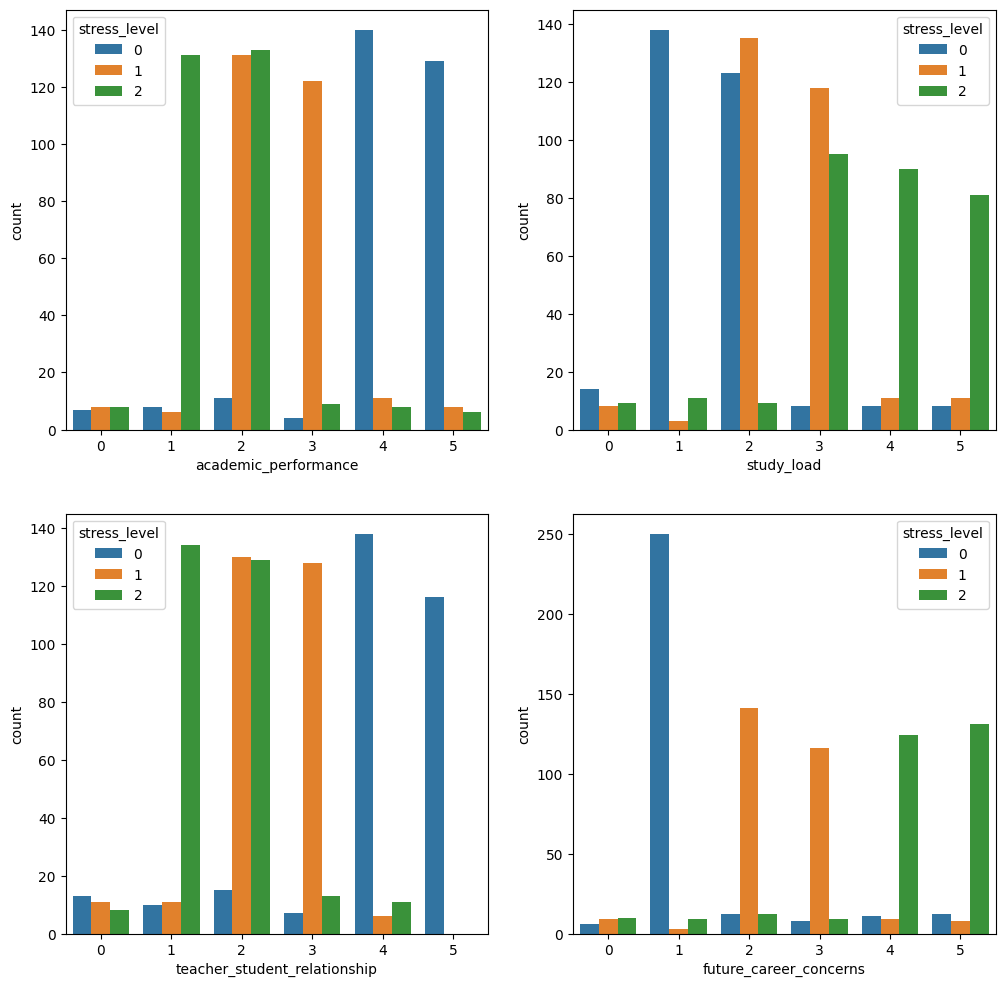

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
columns = train_df.columns[12: 16]
print(columns)

# sns.countplot(x = train_df['anxiety_level'], hue = train_df['stress_level'])
fig, axs = plt.subplots(2, 2, figsize = (12, 12))
for i in range(2):
    for j in range(2):
        sns.countplot(x = train_df[columns[i * 2 + j]], hue = train_df['stress_level'], ax = axs[i, j])

'''
academic performance: 
0: cân bằng
từ 1-5: chuyển dịch dần từ 2-->0

study load: 

0: cân bằng
từ 1-5: no stress --> no stress / eugenic --> eugenic / distress --> distress

teacher-student relationship:
0: như nhau - indecisive
1-5: distress --> eugenic | distress --> ko stress

future careers concern:
0: như nhau.
distress --> eugenic --> no stress
'''

<h2>Social Factors</h2>

Index(['social_support', 'peer_pressure', 'extracurricular_activities',
       'bullying'],
      dtype='object')


'\nsocial support: \n0: same\n1->2->3: distress --> eugenic stress --> no stress\n\npeer pressure: \n\n0: same\n1->5: no stress --> eugenic stress --> distress\n\nExtra-curricular activities:\n0: same\n1->5: no stress --> eugenic stress --> distress\n\nbullying:\n0: như nhau.\n1->5: distress --> eugenic stress --> no stress\n\n'

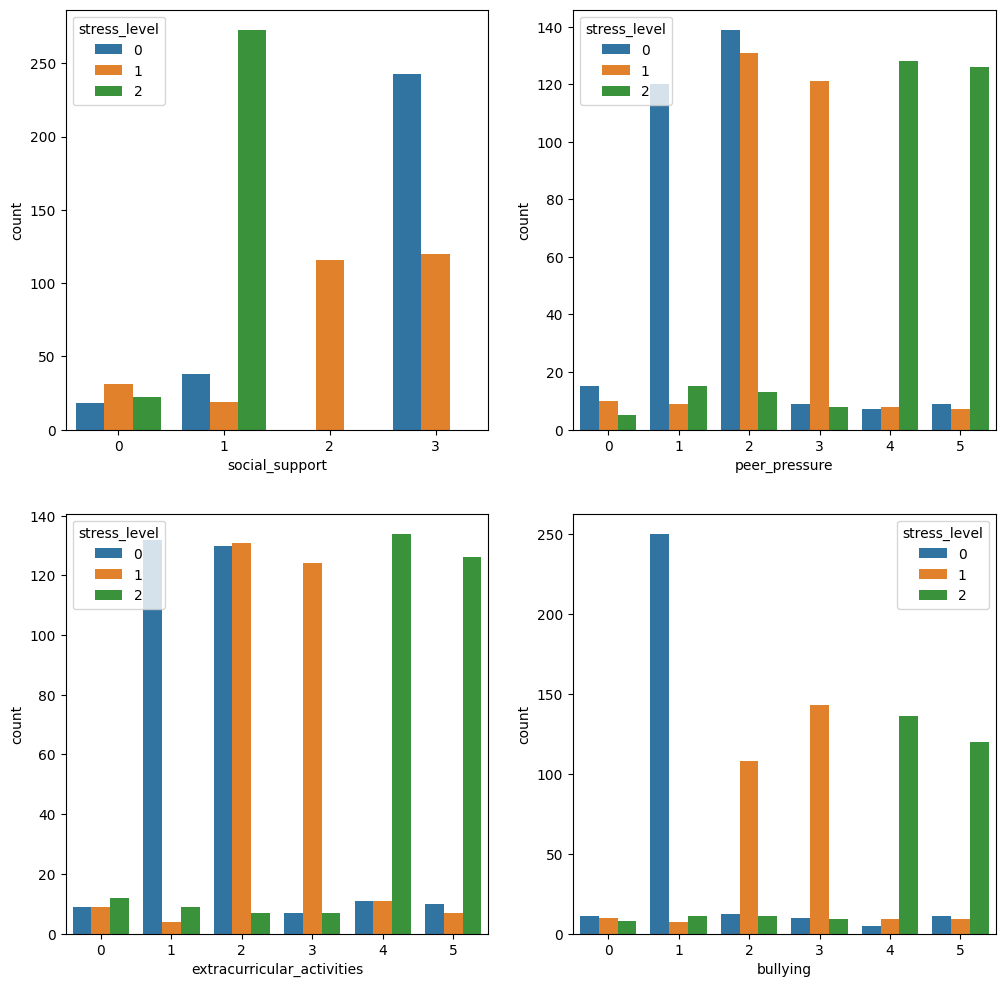

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
columns = train_df.columns[16: 20]
print(columns)

# sns.countplot(x = train_df['anxiety_level'], hue = train_df['stress_level'])
fig, axs = plt.subplots(2, 2, figsize = (12, 12))
for i in range(2):
    for j in range(2):
        sns.countplot(x = train_df[columns[i * 2 + j]], hue = train_df['stress_level'], ax = axs[i, j])


'''
social support: 
0: same
1->2->3: distress --> eugenic stress --> no stress

peer pressure: 

0: same
1->5: no stress --> eugenic stress --> distress

Extra-curricular activities:
0: same
1->5: no stress --> eugenic stress --> distress

bullying:
0: như nhau.
1->5: distress --> eugenic stress --> no stress

'''

<h1>Feature Engineering</h1>

In [10]:
sgn = [-1, 1, -1, -1, 
       -1, 1, 1, -1,
       -1, 1, 1, 1,
       1, -1, 1, -1,
       1, -1, -1, -1, 1]

train_df = pd.read_csv('/kaggle/input/uit-x-thpt-stress-dataset/train.csv')
# train_df = train_df * sgn

'''Nhận xét: Dataset bị đa cộng tuyến nặng'''

'Nhận xét: Dataset bị đa cộng tuyến nặng'

<h2>Visualize</h2>

blood_pressure            0.748745
bullying                  0.621901
sleep_quality             0.618040
future_career_concerns    0.616601
headache                  0.526534
depression                0.506124
social_support            0.503257
anxiety_level             0.421819
dtype: float64
     blood_pressure  bullying  sleep_quality  future_career_concerns  \
0                 1         2              2                       2   
1                 3         5              1                       4   
2                 2         1              5                       1   
3                 3         5              1                       4   
4                 2         1              4                       1   
..              ...       ...            ...                     ...   
875               3         1              1                       3   
876               3         4              1                       5   
877               3         5              1             

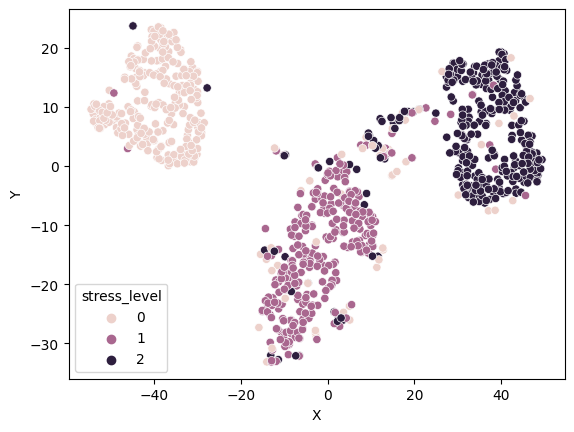

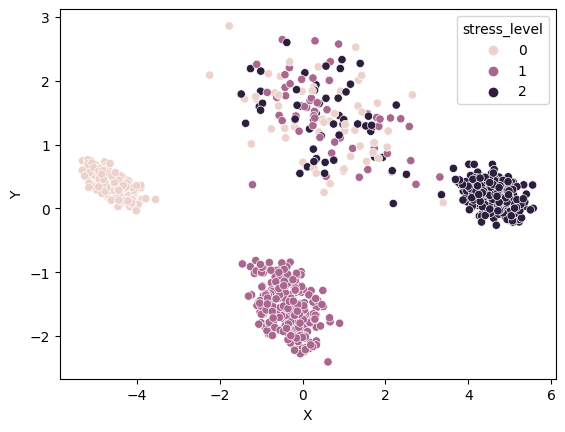

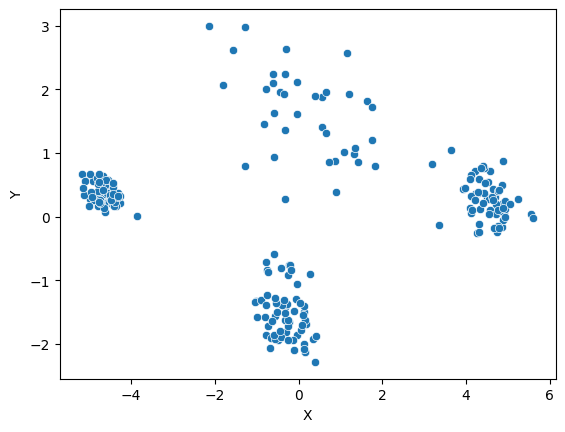

'\nNhận xét của ta là: các nhóm có đặc trưng khá rõ nhưng có một số\nphần tử không theo đặc trưng\n'

In [11]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.feature_selection import mutual_info_regression
import copy
#Visualize bằng TSNE

def scale(train_df, scaler, type):
    df = copy.deepcopy(train_df)
    label = []
    
    if (type == 'train'):
        label = train_df['stress_level']
        df = train_df.drop('stress_level', axis = 1)
        
    if (type == 'test'):
        label = train_df['id']
        df = train_df.drop('id', axis = 1)
        
    scaled_data = scaler.fit_transform(df)

    dict = pd.DataFrame(scaled_data, columns = df.columns, index = df.index)
    df = pd.concat([dict, label], axis = 1)
    return df


def visualize(train_df, decompose, type):
    df = copy.deepcopy(train_df)

    if (type == 'train'):
        label = train_df['stress_level']
        df = train_df.drop('stress_level', axis = 1)
        
    if (type == 'test'):
        label = train_df['id']
        df = train_df.drop('id', axis = 1)
        
    dataPoint = decompose.fit_transform(df)

    dict = pd.DataFrame(dataPoint, columns = ['X', 'Y'], index = df.index)
    
    if (type == 'train'): sns.scatterplot(dict, x = dict['X'], y = dict['Y'], hue = label)
    if (type == 'test'): sns.scatterplot(dict, x = dict['X'], y = dict['Y'])
    plt.show()
    return (dataPoint, label)

def mutual_info(train_df):
    label = train_df['stress_level']
    inp = train_df.drop('stress_level', axis = 1)
    mi_scores = mutual_info_regression(inp, label)
    mi_series = pd.Series(mi_scores, index = inp.columns)
    mi_series = mi_series.sort_values(ascending=False)

    return mi_series

def getBestFeatures(train_df, threshold):
    ranking = mutual_info(train_df)
    filtered_df = ranking.loc[ranking > threshold]
    print(filtered_df)
    columns = filtered_df.index
    return columns

def chooseFeatures(train_df, features, type):
    label = []
    if (type == 'train'): 
        label = train_df['stress_level']
    if (type == 'test'):
        label = train_df['id']
        
    df = train_df[features]
    return pd.concat([df, label], axis = 1)
            
bestFeatures = getBestFeatures(train_df, 0.4)
df = chooseFeatures(train_df, bestFeatures, 'train')

print(df)

visualize(train_df, TSNE(n_components = 2), 'train')

scaled_df = scale(train_df, StandardScaler(), 'train')
visualize(scaled_df, PCA(n_components = 2), 'train')


test_df = pd.read_csv('/kaggle/input/uit-x-thpt-stress-dataset/test.csv')
scaled_df = scale(test_df, StandardScaler(), 'test')
visualize(scaled_df, PCA(n_components = 2), 'test')
'''
Nhận xét của ta là: các nhóm có đặc trưng khá rõ nhưng có một số
phần tử không theo đặc trưng
'''


<h2>Transform</h2>

In [12]:
def pick(df, l, r, type):
    label = []
    columns = []
    if (type == 'train'):
        label = df['stress_level']
        columns = df.columns[l:r]
        
    if (type == 'test'):
        label = df['id']
        columns = df.columns[l:r]
        
    return pd.concat([df[columns], label], axis = 1)

# for i in range(5):
#     new_df = pick(train_df, i * 4, (i + 1) * 4, 'train')
#     scaled_new_df = scale(new_df, StandardScaler(), 'train')
#     visualize(new_df, TSNE(n_components = 2), 'train')

def Dimensionality(train_df, n_components, type):
    #Scale before using PCA

    label = []
    df = copy.deepcopy(train_df)
    if (type == 'train'):
        label = train_df['stress_level']
        df = train_df.drop('stress_level', axis = 1)
    if (type == 'test'):
        label = train_df['id']
        df = train_df.drop('id', axis = 1)   

    s = StandardScaler()
    scaled_data = s.fit_transform(df)
    df = pd.DataFrame(scaled_data, columns = df.columns, index = df.index)

    pca = PCA(n_components = n_components)
    
    decomposed_data = pca.fit_transform(df)
    pca_columns = [str(i) for i in range(n_components)]
    df = pd.DataFrame(decomposed_data, columns = pca_columns, index = df.index)
    df = pd.concat([df, label], axis = 1)
    return df;

np.random.seed(42)


def addFeature(train_df, featured_df, sampling_size = 0, times = 0):
    indices = np.random.choice(np.arange(len(train_df)), 
                               size = int(sampling_size * len(train_df)),
                               replace = False)
    new_df = train_df.loc[indices]
    for i in range(times):
        new_df = pd.concat([new_df, featured_df], axis = 0)
    return new_df
    
feature_set = np.load('/kaggle/input/uit-x-thpt-stress-dataset/feature_set.npy')
featured_df = train_df.loc[feature_set]



<h1>Mô hình</h1>

In [13]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, TensorDataset
import torch.optim as optim
import torch.nn.functional as F
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import copy
from torch.optim.lr_scheduler import ReduceLROnPlateau


<h2>Machine Learning</h2>

In [14]:
def MachineLearning(input, target, model, name, test_size = 0.05):
    print(f'Train {name} model ')
    train_input, validate_input, train_output, validate_output = train_test_split(input, target, random_state = 42, test_size = test_size)

    X_train = train_input
    X_valid = validate_input
    y_train = train_output
    y_valid = validate_output

    m = copy.deepcopy(model) 
    m.fit(X_train, y_train)
    preds = m.predict(X_valid)
    accuracy = accuracy_score(preds, y_valid) * 100
    print(f'VALIDATE ACCURACY of {name}: {accuracy}')
    return m
    
def runML(train_df):
    df = copy.deepcopy(train_df)
    
    inp = df.drop('stress_level', axis = 1).values
    tgt = df['stress_level'].values
    
    listML = {}
    MLcandidates = [RandomForestClassifier(random_state = 42,
                                           max_depth = 30,
                                           n_estimators = 50,
                                           max_leaf_nodes = 40),
                    CatBoostClassifier(random_state = 42, 
                                       iterations = 600,
                                       learning_rate = 1e-5,
                                       loss_function = 'MultiClass',
                                       verbose = False,
                                       ),
                    XGBClassifier(random_state = 42,
                                  learning_rate = 1e-4,
                                  max_depth = 7,
                                  n_estimators = 30,
                                  gamma = 0,
                                  alpha = 1,
                                  min_child_weight = 10,
                                  objective = 'multi:softmax',
                                  subsample = 0.7,
                                  colsample_bytree = 0.7),
                    
                    SVC(kernel = 'poly', degree = 7, gamma = 'auto', C = 0.5, decision_function_shape = 'ovo')
                   ]
    MLname = ['RandomForest', 'CatBoost', 'XGBoost', 'SVM']
    for i, name in enumerate(MLname):
        listML[name] = MachineLearning(inp, tgt, MLcandidates[i], name)
    return listML


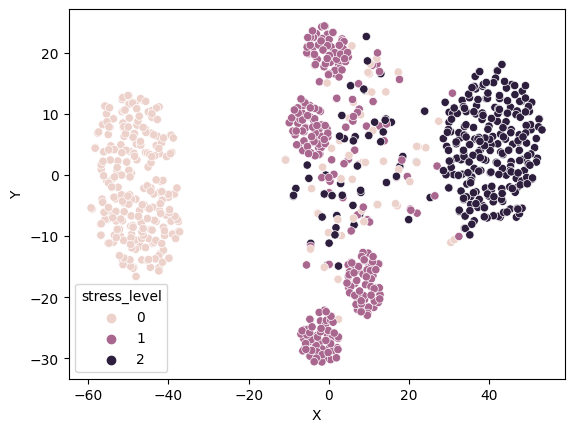

Train RandomForest model 
VALIDATE ACCURACY of RandomForest: 93.18181818181817
Train CatBoost model 
VALIDATE ACCURACY of CatBoost: 88.63636363636364
Train XGBoost model 
VALIDATE ACCURACY of XGBoost: 90.9090909090909
Train SVM model 
VALIDATE ACCURACY of SVM: 93.18181818181817


In [15]:
input_df = addFeature(train_df, featured_df, 1, 10)
input_df = scale(train_df, StandardScaler(), 'train')
visualize(input_df, TSNE(n_components = 2), 'train')
# input_df = Dimensionality(train_df, 20, 'train')
listML = runML(input_df)

<h3>Feature Set </h3>

In [16]:
def compare(train_df, model):
    tgt = input_df['stress_level']
    inp = input_df.drop('stress_level', axis = 1)
    pred_label = model.predict(inp)
    pred_label = pred_label.reshape(-1)
    comparison = (pred_label == tgt)

    wrong_id_ML = []
    
    for i, cmp in enumerate(comparison):
        if (cmp == False):
            wrong_id_ML.append(i)
    
    print(wrong_id_ML, len(wrong_id_ML))
    
    return wrong_id_ML
    
# FeatureSetML = compare(input_df, listML['CatBoost'])



# filter_df = train_df.loc[FeatureSetML]
# filter_df = scale(filter_df, StandardScaler(), 'train')
# # print(filter_df)

# data, label = visualize(filter_df, PCA(n_components = 2), 'train')



<h2>Machine Learning Test</h2>

In [17]:
test_df = pd.read_csv('/kaggle/input/uit-x-thpt-stress-dataset/test.csv')


def export(input_df):
    id = input_df['id']
    inp = input_df.drop('id', axis = 1).values
    
    tgt = listML['CatBoost'].predict(inp)
    
    tgt = tgt.reshape(-1)
    
    dict = {'id': id, 'output': tgt}
    
    output = pd.DataFrame(dict)
    output.to_csv('ML.csv', index = False)
    return tgt

input_df = scale(test_df, StandardScaler(), 'test')
# input_df = Dimensionality(test_df, 16, 'test')
answer = export(input_df)
print(answer)


[0 0 2 2 2 0 2 2 1 0 1 0 0 2 2 1 1 2 1 1 0 2 0 1 2 0 0 1 0 2 1 1 1 2 0 2 2
 2 2 2 0 2 2 0 0 2 0 1 2 0 1 1 1 1 0 2 2 0 0 0 1 0 0 2 1 1 2 0 2 2 2 1 2 1
 2 1 0 2 0 1 1 2 2 1 0 0 1 1 1 2 2 0 2 1 0 2 2 2 0 1 2 2 0 1 2 1 2 2 0 0 2
 0 2 1 1 2 1 0 2 2 0 2 2 2 0 2 1 1 0 2 0 2 2 1 2 1 1 1 0 1 2 1 1 2 2 1 0 1
 2 0 2 0 0 1 1 2 0 2 1 0 2 0 0 0 1 2 1 1 2 1 0 1 2 2 2 2 0 0 2 1 0 1 1 2 2
 1 1 0 1 1 2 1 0 0 2 0 2 1 2 2 2 2 2 2 0 2 2 0 1 0 2 0 2 2 2 2 1 0 2 0]


<h2>Deep Learning</h2>

In [18]:
class ClassifyingModel(nn.Module):
    '''
    Một mô hình Phân loại đơn giản với 4 layer:
    Layer1: FC(input_dim --> 1024) + ReLU
    Layer2: FC(1024 --> 1024) + dropout
    Layer3: FC(1024 --> 1024) + ReLU
    Classify: FC(1024, 3)
    '''
    def __init__(self, input_dim, output_dim, dropout = 0.1):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 16)
        self.fc2 = nn.Linear(16, 32)
        self.fc3 = nn.Linear(32, 64)
        self.classification_head = nn.Linear(64, output_dim)
        self.relu = F.relu
        self.gelu = F.gelu
        self.tanh = F.tanh
        self.dropout = nn.Dropout(p = dropout)
        
    def forward(self, x):
        x1 = self.fc1(x)
        x1 = self.relu(x1)
        x1 = self.dropout(x1)
        
        x2 = self.fc2(x1)
        x2 = self.tanh(x2)
        x2 = self.dropout(x2)

        x3 = self.fc3(x2)
        x3 = self.relu(x3)
        x3 = self.dropout(x3)
        
        logits = self.classification_head(x3)
        return logits
        

In [19]:
       
def train_nn(input, target, input_dim, output_dim, name = "neural_network", 
             epochs = 50, test_size = 0.2, dropout_p = 0.1, batch_size = 16):
    '''
    Return a model that is trained on the dataset X, y
    The training steps are as followed:
    - Split the set into 2 sets of training and validating.
    - Train model
    '''
    device = 'cpu'
    if (torch.cuda.is_available()): device = 'cuda'
    
    print(f'Train {name} Model')
    epochs = epochs
    train_input, validate_input, train_output, validate_output = train_test_split(input, target, test_size = test_size, random_state = 42)

    X_train = torch.tensor(train_input, dtype = torch.float32)
    X_valid = torch.tensor(validate_input, dtype = torch.float32)
    y_train = torch.tensor(train_output, dtype = torch.long)
    y_valid = torch.tensor(validate_output, dtype = torch.long)
    print(len(X_train), len(y_train))

    train_dataset = TensorDataset(X_train, y_train)
    valid_dataset = TensorDataset(X_valid, y_valid)
    
    num_train_samples = len(train_dataset)
    num_valid_samples = len(valid_dataset)
    
    train_batch = DataLoader(train_dataset, batch_size = batch_size, shuffle = True)
    valid_batch = DataLoader(valid_dataset, batch_size = batch_size, shuffle = True)

    criterion = nn.CrossEntropyLoss()
    model = ClassifyingModel(input_dim, output_dim, dropout = dropout_p)
    model.to(device)

    optimizer = optim.Adam(model.parameters(), lr = 1e-3, weight_decay = 1e-3)
    
    best_accuracy = 0
    best_model = []

    for epoch in range(epochs):
        model.train()
        train_loss = 0
        train_accuracy = 0
        valid_loss = 0
        valid_accuracy = 0
        
        for X_batch, y_batch in train_batch:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            
            optimizer.zero_grad()
            
            pred_logits = model(X_batch)
            pred_label = pred_logits.argmax(dim = 1)
            

            loss = criterion(pred_logits, y_batch)
            accuracy = (pred_label == y_batch).sum()
            
            train_loss += loss.item() / num_train_samples 
            train_accuracy += accuracy.item() / num_train_samples

            # print('-----Debug-----')
            # print(pred_logits)
            # print(pred_label)

            loss.backward()
            optimizer.step()

        model.eval()
        for X_batch, y_batch in valid_batch:     
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            pred_logits = model(X_batch)
            pred_label = pred_logits.argmax(dim = 1)

            loss = criterion(pred_logits, y_batch)
            accuracy = (pred_label == y_batch).sum()
            
            
            valid_loss += loss.item() / num_valid_samples 
            valid_accuracy += accuracy.item() / num_valid_samples

                       
        if ((epoch + 1) % 10 == 0):
            print(f'------------------Epoch {epoch + 1}--------------')
            print(f'Train Loss: {train_loss} | Train Accuracy {train_accuracy * 100}')
            print(f'Validate Loss: {valid_loss} | Validate Accuracy: {valid_accuracy * 100}')

                
        if (valid_accuracy > best_accuracy):
            best_accuracy = valid_accuracy
            torch.save(model.state_dict(), 'checkpoint.pth')

    return model
    
def getModel(train_df):
    df = copy.deepcopy(train_df)
    inp = df.drop('stress_level', axis = 1).values
    
    input_dim = len(df.columns) - 1
    output_dim = 3
    
    tgt = df['stress_level'].values
    
    neural_network = train_nn(inp, tgt, input_dim, output_dim, 
                              epochs = 500, dropout_p = 0.3, test_size = 0.7, batch_size = 32)
    neural_network.load_state_dict(torch.load('/kaggle/working/checkpoint.pth'))
    return neural_network

In [20]:
input_df = addFeature(train_df, featured_df, sampling_size = 0.7, times = 4)
# input_df = Dimensionality(input_df, 16, 'train')
# print(input_df)
input_df = scale(input_df, StandardScaler(), 'train')
neural_network = getModel(input_df)

Train neural_network Model
301 301
------------------Epoch 10--------------
Train Loss: 0.026824458096906596 | Train Accuracy 69.43521594684384
Validate Loss: 0.025624156930877336 | Validate Accuracy: 68.84779516358465
------------------Epoch 20--------------
Train Loss: 0.020262929886282477 | Train Accuracy 75.08305647840531
Validate Loss: 0.02038090128138937 | Validate Accuracy: 74.53769559032717
------------------Epoch 30--------------
Train Loss: 0.01613420762889013 | Train Accuracy 82.05980066445183
Validate Loss: 0.01888245115239454 | Validate Accuracy: 76.38691322901849
------------------Epoch 40--------------
Train Loss: 0.015376417343798665 | Train Accuracy 80.73089700996677
Validate Loss: 0.01856531192194856 | Validate Accuracy: 77.0981507823613
------------------Epoch 50--------------
Train Loss: 0.013949735814154743 | Train Accuracy 84.71760797342193
Validate Loss: 0.01794997432069114 | Validate Accuracy: 80.51209103840684
------------------Epoch 60--------------
Train Loss

<h3>Deep Learning Feature Set</h3>

[34, 45, 49, 53, 74, 88, 92, 107, 111, 121, 123, 130, 159, 161, 167, 175, 214, 251, 260, 280, 313, 325, 343, 369, 387, 438, 453, 459, 524, 529, 531, 554, 562, 584, 594, 601, 646, 656, 663, 712, 729, 739, 740, 758, 779, 793, 812, 813, 844, 857, 869, 879] 52


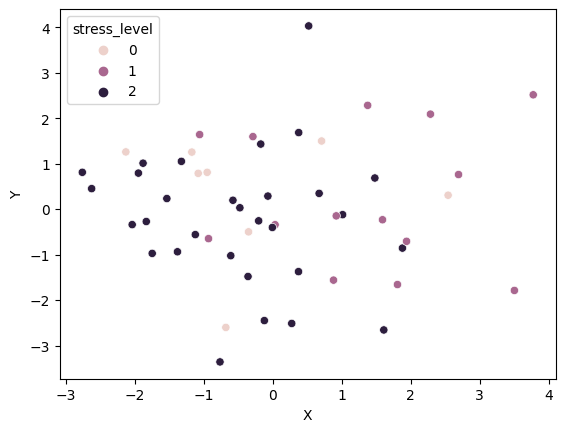

'Get Feature Set through DEEP LEARNING'

In [21]:
def compare(input_df, model):
    '''Return the comparision between targetted label and predicted label'''
    df = copy.deepcopy(input_df)

    
    tgt = torch.tensor(df['stress_level'].values, dtype = torch.float32).to('cuda')
    df = df.drop('stress_level', axis = 1)
    
    inp = torch.tensor(df.values, dtype = torch.float32).to('cuda')

    pred_logits = model(inp)

    pred_label = pred_logits.argmax(dim = 1)

    comparison = (pred_label == tgt)

    wrong_id_DL = []
    
    for i, cmp in enumerate(comparison):
        if (cmp == False):
            wrong_id_DL.append(i)
    
    return wrong_id_DL

df = scale(train_df, StandardScaler(), 'train')
FeatureSetDL = compare(df, neural_network)
print(FeatureSetDL, len(FeatureSetDL))
filter_df = train_df.loc[FeatureSetDL]
filter_df = scale(filter_df, StandardScaler(), 'train')
# print(filter_df)

_ = visualize(filter_df, PCA(n_components = 2), 'train') #Visualize PCA
'''Get Feature Set through DEEP LEARNING'''

In [22]:
# def merge(FeatureSetML, FeatureSetDL):
#     result = np.array([])
#     for i in range(1000):
#         if (i in FeatureSetML or i in FeatureSetDL):
#             result = np.hstack([result, i])
#     return result

# feature_set = merge(FeatureSetML, FeatureSetDL)
# np.save('feature_set.npy', feature_set)

<h2>Deep Learning Test</h2>

In [23]:
test_df = pd.read_csv('/kaggle/input/uit-x-thpt-stress-dataset/test.csv')

def export(input_df):
    id = input_df['id']
    inp = input_df.drop('id', axis = 1).values
    
    tensor_inp = torch.tensor(inp, dtype = torch.float32).to('cuda')
    tgt = neural_network(tensor_inp)
    
    pred_label = tgt.argmax(1).to('cpu')
        
    output = pd.DataFrame({'id': id, 'stress_level': pred_label })
    output.to_csv('DL.csv', index = False)
    return pred_label

input_df = test_df

input_df = scale(input_df, StandardScaler(), 'test')
# input_df = Dimensionality(test_df, 16, 'test')

result = export(input_df)

print(result)




tensor([0, 0, 2, 2, 2, 0, 2, 1, 1, 0, 1, 0, 0, 2, 2, 1, 1, 2, 1, 1, 0, 1, 0, 1,
        0, 0, 1, 1, 1, 0, 1, 1, 1, 2, 0, 2, 2, 2, 2, 2, 0, 1, 2, 0, 0, 2, 0, 1,
        2, 0, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 1, 0, 0, 2, 1, 1, 2, 0, 2, 2, 2, 1,
        2, 1, 2, 1, 0, 0, 0, 1, 1, 2, 2, 1, 0, 0, 1, 1, 1, 2, 2, 0, 0, 1, 0, 2,
        0, 1, 0, 1, 2, 2, 0, 1, 2, 1, 2, 2, 0, 0, 0, 0, 2, 1, 1, 2, 1, 0, 2, 2,
        0, 2, 2, 2, 0, 0, 1, 1, 0, 2, 0, 0, 0, 1, 2, 1, 1, 1, 0, 1, 0, 1, 1, 0,
        1, 1, 0, 1, 2, 0, 2, 0, 0, 1, 1, 2, 0, 2, 1, 0, 2, 0, 0, 0, 1, 1, 1, 1,
        0, 1, 0, 1, 0, 2, 2, 2, 0, 0, 0, 1, 0, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1,
        0, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 2, 0, 0, 2, 2, 0,
        1, 0, 2, 0])
